# Лабораторная 2

## AND and OR operators

**Stochastic gradient**

[0 0]: -1.3979415134794428 -> 0
[0 1]: -0.3457758616183546 -> 0
[1 0]: -0.5570482771101037 -> 0
[1 1]: 0.4951173747509845 -> 1
WEIGHT bias: 0.8408932363693391  w1: 1.0521656518610882  w2:-1.3979415134794428


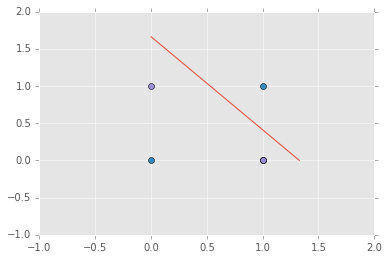

[0 0]: -0.19676143104556265 -> 0
[0 1]: 0.5174289698278746 -> 1
[1 0]: 0.6489458856046643 -> 1
[1 1]: 1.3631362864781016 -> 1
WEIGHT bias: 0.8457073166502269  w1: 0.7141904008734372  w2:-0.19676143104556265


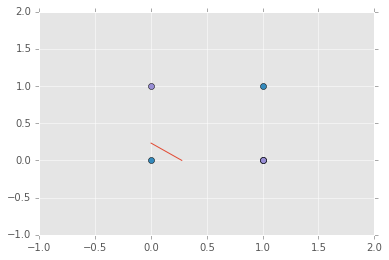

In [2]:
from random import choice
from numpy import array, dot, random
import matplotlib.pyplot as plt

unit_step = lambda x: 0 if x < 0 else 1

training_data_or = [
    (array([0, 0, 1]), 0),
    (array([0, 1, 1]), 1),
    (array([1, 0, 1]), 1),
    (array([1, 1, 1]), 1),
]

training_data_and = [
    (array([0, 0, 1]), 0),
    (array([0, 1, 1]), 0),
    (array([1, 0, 1]), 0),
    (array([1, 1, 1]), 1),
]



input = array([ [0,0],
            [0,1],
            [1,0],
            [1,1]
          ])



def calc(training_data):
    w = random.rand(3)
    errors = []
    eta = 0.5
    n = 100

    for i in range(n):
        x, expected = choice(training_data)
        result = dot(w, x)
        error = expected - unit_step(result)
        errors.append(error)
        w += eta * error * x

    for x, _ in training_data:
        result = dot(x, w)
        print("{}: {} -> {}".format(x[:2], result, unit_step(result)))
    print("WEIGHT bias: {}  w1: {}  w2:{}".format(w[0], w[1], w[2]))

    plt.style.use('ggplot')

    w2, w1, b = w
    x = -b / w1
    y = -b / w2

    d = y
    c = -y / x

    line_x_coords = array([0, x])
    line_y_coords = c * line_x_coords + d

    plt.plot(line_x_coords, line_y_coords)
    plt.plot(input[1:], input[:-1], 'o')
    plt.axis([-1, 2, -1, 2])
    plt.show()




calc(training_data_and)
calc(training_data_or)


## XOR
**Using Back Propagation**

Network scheme like 2-3-1 and like 2-2-1

In [4]:
import numpy as np


def leanr_xor(scheme, epochs):
    epochs = 20000  # Number of iterations
    inputLayerSize, hiddenLayerSize, outputLayerSize = scheme
    L = 0.1  # learning rate

    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    Y = np.array([[0], [1], [1], [0]])

    def sigmoid(x): return 1 / (1 + np.exp(-x))  # activation function

    def sigmoid_(x): return x * (1 - x)  # derivative of sigmoid

    # weights on layer inputs
    Wh = np.random.uniform(size=(inputLayerSize, hiddenLayerSize))
    Wz = np.random.uniform(size=(hiddenLayerSize, outputLayerSize))

    for _ in range(epochs):
        H = sigmoid(np.dot(X, Wh))  # hidden layer results
        Z = np.dot(H, Wz)  # output layer, no activation
        E = Y - Z  # error
        dZ = E * L  # delta Z
        Wz += H.T.dot(dZ)  # update output layer weights
        dH = dZ.dot(Wz.T) * sigmoid_(H)  # delta H
        Wh += X.T.dot(dH)  # update hidden layer weights

    print('Hidden layer: \n' + str(Wh))
    print('Output layer: \n' + str(Wz))

    print('Z: \n' + str(Z))


print('Scheme 2-3-1')
leanr_xor([2, 3, 1], 20000)

print('\nScheme 2-2-1')
leanr_xor([2, 2, 1], 20000)

Scheme 2-3-1
Hidden layer: 
[[ 0.75554693  4.47111251 -0.91605372]
 [ 0.81687129  4.51012895 -0.63039982]]
Output layer: 
[[-6.17873463]
 [ 4.89133185]
 [ 1.28740278]]
Z: 
[[1.31450406e-13]
 [1.00000000e+00]
 [1.00000000e+00]
 [3.08197912e-13]]

Scheme 2-2-1
Hidden layer: 
[[1.87283225 5.88445288]
 [1.87262915 5.87594347]]
Output layer: 
[[-8.67702868]
 [ 8.53379884]]
Z: 
[[-0.0716158 ]
 [ 0.98899793]
 [ 0.98899621]
 [ 0.05696599]]


**How it works:**
Input + hidden layer

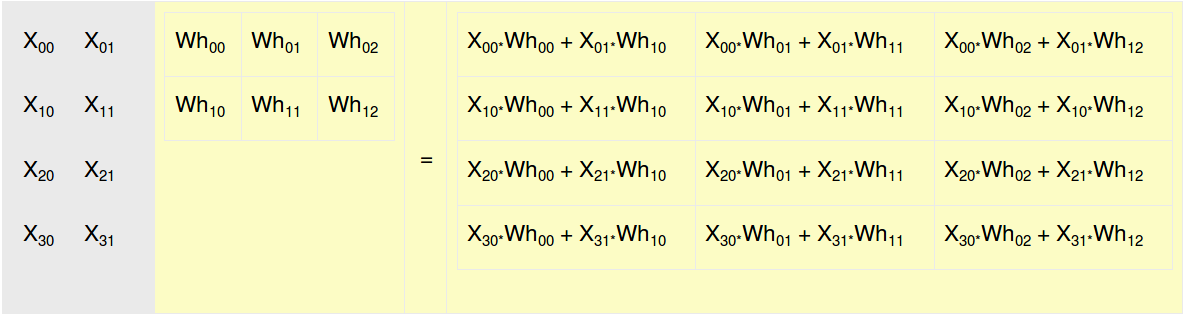